# **OBJECTIVE :- Apply different MLP Architectures on MNIST dataset**

In [1]:
# Importing libraries
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import time

# the data, shuffled and split between train and test sets 
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Number of training examples : 60000 and each image is of shape (28, 28)
Number of test examples : 10000 and each image is of shape (28, 28)


In [2]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of test examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of test examples : 10000 and each image is of shape (784)


In [3]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [5]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

# example data point after normlizing
print(X_train[0])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [6]:
# here we are having a class number for each image
print("Class label of first image :", Y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

y_train = np_utils.to_categorical(Y_train, 10) 
y_test = np_utils.to_categorical(Y_test, 10)

print("After converting the output into a vector : ",y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
# this function is used draw Categorical Crossentropy Loss VS No. of epochs plot
def plt_dynamic(x, vy, ty):
  plt.figure(figsize=(10,5))
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.title('\nCategorical Crossentropy Loss VS Epochs')
  plt.legend()
  plt.grid()
  plt.show()

## (1). Softmax Classifier with 2 hidden layers

### (1.a) Without dropout and Batch normalization

In [8]:
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.initializers import he_normal

# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

# Initialising model
model_2 = Sequential()

# Adding first hidden layer
model_2.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_2.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_2.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print("Model Summary :- \n",model_2.summary())

# Compiling the model
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_2 = model_2.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________
Model Summary :- 
 None
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.8276 - acc: 0.7720 - val_loss: 0.3774 - val_acc: 0.8896
Epoch 2/20
60000/60000 [==============================] - 7s 123us/s

Test score: 0.07642286013420671
Test accuracy: 0.9759


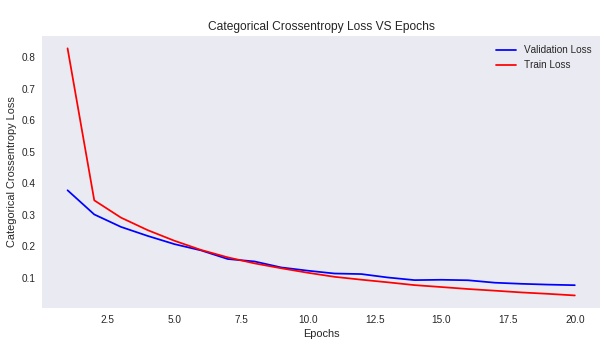

In [9]:
# Evaluating the model
score = model_2.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_2_test = score[1]
model_2_train = history_2.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_2.history['val_loss']
# Training loss
ty = history_2.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### (1.b) With dropout and Batch Normalization

In [10]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

# Initialising model
model_2d = Sequential()

# Adding first hidden layer
model_2d.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2d.add(BatchNormalization())
# Adding dropout to first hidden layer
model_2d.add(Dropout(0.4))

# Adding second hidden layer
model_2d.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_2d.add(BatchNormalization())
# Adding dropout to second hidden layer
model_2d.add(Dropout(0.4))

# Adding output layer
model_2d.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print("Model Summary :- \n",model_2d.summary())

# Compiling the model
model_2d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_2d = model_2d.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
___________________________

Test score: 0.07667584380609915
Test accuracy: 0.9764


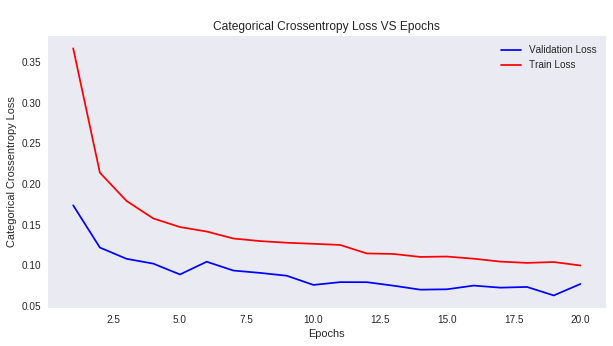

In [12]:
# Evaluating the model
score = model_2d.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_2d_test = score[1]
model_2d_train = history_2d.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_2d.history['val_loss']
# Training loss
ty = history_2d.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## (2). Softmax Classifier with 3  hidden layers

### (2.a) Without Dropout and Batch Normalization

In [13]:
# Initialising model
model_3 = Sequential()

# Adding first hidden layer
model_3.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_3.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding third hidden layer
model_3.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_3.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_3.summary())

# Compiling the model
model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_3 = model_3.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 567,434
Trainable params: 567,434
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 11s 187us/step - loss: 0.7319 - acc: 0.7790 - val_loss: 0.3602 - val_acc: 0.8931
Epoch 2/20
60000/60000 [==============================] - 11s 179us/step -

Test score: 0.08041134356782713
Test accuracy: 0.9771


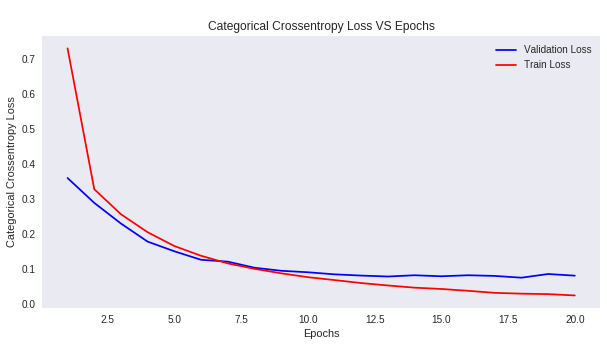

In [14]:
# Evaluating the model
score = model_3.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3_test = score[1]
model_3_train = history_3.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_3.history['val_loss']
# Training loss
ty = history_3.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### (2.b) With Droput and Batch Normalization

In [15]:
model_3d = Sequential()

# Adding first hidden layer
model_3d.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3d.add(BatchNormalization())
# Adding dropout
model_3d.add(Dropout(0.4))

# Adding second hidden layer
model_3d.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3d.add(BatchNormalization())
# Adding dropout
model_3d.add(Dropout(0.4))

# Adding third hidden layer
model_3d.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_3d.add(BatchNormalization())
# Adding dropout
model_3d.add(Dropout(0.4))

# Adding output layer
model_3d.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_3d.summary())

# Compiling the model
model_3d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_3d = model_3d.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               32896     
__________

Test score: 0.06945714832819067
Test accuracy: 0.978


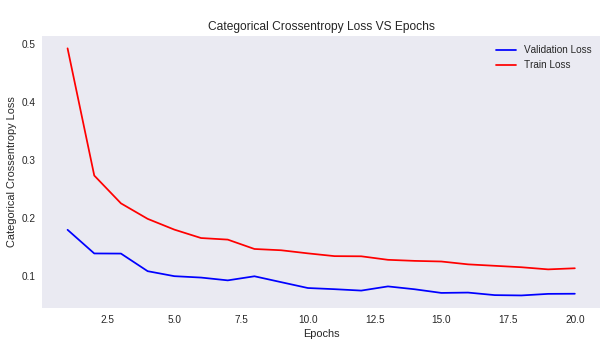

In [16]:
# Evaluating the model
score = model_3d.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_3d_test = score[1]
model_3d_train = history_3d.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_3d.history['val_loss']
# Training loss
ty = history_3d.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## (3). Softmax Classifier with 5 hidden layers 

(3.a) Without Dropout and Batch Normalization

In [17]:
# Initialising model
model_5 = Sequential()

# Adding first hidden layer
model_5.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))

# Adding second hidden layer
model_5.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding third hidden layer
model_5.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding fourth hidden layer
model_5.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding fifth hidden layer
model_5.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))

# Adding output layer
model_5.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_5.summary())

# Compiling the model
model_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_5 = model_5.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_18 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_19 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_20 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________
None

Test score: 0.08839814674687223
Test accuracy: 0.9783


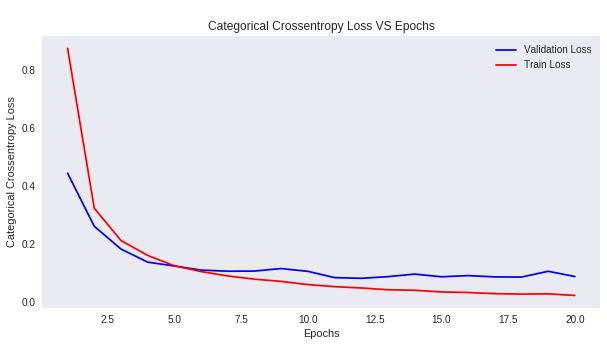

In [19]:
# Evaluating the model
score = model_5.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_5_test = score[1]
model_5_train = history_5.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_5.history['val_loss']
# Training loss
ty = history_5.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

### (3.b) With Dropout and Batch Normalisation

In [20]:
# Initialising model
model_5d = Sequential()

# Adding first hidden layer
model_5d.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.4))

# Adding second hidden layer
model_5d.add(Dense(256, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.4))

# Adding third hidden layer
model_5d.add(Dense(128, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.4))

# Adding fourth hidden layer
model_5d.add(Dense(64, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.4))

# Adding fifth hidden layer
model_5d.add(Dense(32, activation='relu', kernel_initializer=he_normal(seed=None)))
# Adding Batch Normalization
model_5d.add(BatchNormalization())
# Adding dropout
model_5d.add(Dropout(0.4))

# Adding output layer
model_5d.add(Dense(output_dim, activation='softmax'))

# Printing model Summary
print(model_5d.summary())

# Compiling the model
model_5d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fitting the data to the model
history_5d = model_5d.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 128)               32896     
__________

Test score: 0.09278820200497284
Test accuracy: 0.9751


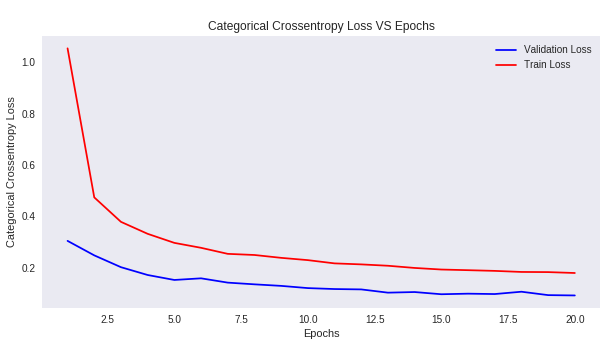

In [21]:
# Evaluating the model
score = model_5d.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

# Test and train accuracy of the model
model_5d_test = score[1]
model_5d_train = history_5d.history['acc']

# Plotting Train and Test Loss VS no. of epochs
# list of epoch numbers
x = list(range(1,nb_epoch+1))

# Validation loss
vy = history_5d.history['val_loss']
# Training loss
ty = history_5d.history['loss']

# Calling the function to draw the plot
plt_dynamic(x, vy, ty)

## CONCLUSION 

## (a). Procedure Followed :

1.   Load MNIST dataset
2.   Split the dataset into train and test
3.   Normalize the train and test data
4.   Convert class variable into categorical data vector
5.   Implement Softmax classifier with 2 , 3 and 5 hidden layers(512,256,128,64,32 respectively) .
6.   Add Dropout(rate 40%) and Batch Normalization to the hidden layers .
7.   Draw Categorical Crossentropy Loss VS No.of Epochs plot . 



## (b) Table (Different models with their train and test accuracies):

In [22]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["MLP_Hidden_Layers", "MODEL", "Training Accuracy", "Test Accuracy"]

x.add_row([2, "Without Dropout and Batch Normalization",0.95,0.95])
x.add_row([2, "With Dropout and Batch Normalization",0.96,0.97])
x.add_row([3, "Without Dropout and Batch Normalization",0.95,0.95])
x.add_row([3,"With Dropout and Batch Normalization",0.95,0.95])
x.add_row([5, "Without Dropout and Batch Normalization",0.96,0.96])
x.add_row([5,"With Dropout and Batch Normalization",0.95,0.96])

print(x)


+-------------------+-----------------------------------------+-------------------+---------------+
| MLP_Hidden_Layers |                  MODEL                  | Training Accuracy | Test Accuracy |
+-------------------+-----------------------------------------+-------------------+---------------+
|         2         | Without Dropout and Batch Normalization |        0.95       |      0.95     |
|         2         |   With Dropout and Batch Normalization  |        0.96       |      0.97     |
|         3         | Without Dropout and Batch Normalization |        0.95       |      0.95     |
|         3         |   With Dropout and Batch Normalization  |        0.95       |      0.95     |
|         5         | Without Dropout and Batch Normalization |        0.96       |      0.96     |
|         5         |   With Dropout and Batch Normalization  |        0.95       |      0.96     |
+-------------------+-----------------------------------------+-------------------+---------------+
